In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
path_to_files = "../../results/pgrabysz/DL1920-assignment3-data/"

train_x_pd = pd.read_csv(path_to_files+"train_x.csv", header=None)
train_y_pd = pd.read_csv(path_to_files+"train_y.csv", header=None)
test_x_pd = pd.read_csv(path_to_files+"test_x.csv", header=None)
test_y_pd = pd.read_csv(path_to_files+"test_y.csv", header=None)

### Analiza danych

Poniżej zamieniam data_frame na tensor numpy

In [176]:
train_x = np.zeros((train_x_pd.shape[0], 5, 2))
for i in range(train_x_pd.shape[0]):
    for j in range(5):
        train_x[i,j,0] = train_x_pd.iloc[i,j].split("-")[0]
        train_x[i,j,1] = train_x_pd.iloc[i,j].split("-")[1]

train_y = train_y_pd[0].to_numpy()

test_x = np.zeros((test_x_pd.shape[0], 5, 2))
for i in range(test_x_pd.shape[0]):
    for j in range(5):
        test_x[i,j,0] = test_x_pd.iloc[i,j].split("-")[0]
        test_x[i,j,1] = test_x_pd.iloc[i,j].split("-")[1]

test_y = test_y_pd[0].to_numpy()

In [135]:
idx0 = np.where(train_y==0)[0]
idx1 = np.where(train_y==1)[0]
idx2 = np.where(train_y==2)[0]
idx3 = np.where(train_y==3)[0]

Żeby zrozumieć, jak rozkładają się szeregi, pokażę na histogramie 2d rozkład każdego z pięciu punktów dla danego typu szeregu.
Żółty kwadracik oznacza, że dla danego szeregu w tym miejscu na kracie często znajdywał się punkt.

Na poniższym wykresie kolejne wiersze odpowiadają kolejnym punktom szeregu, zaś wiersze odpowiadają różnym klasom.

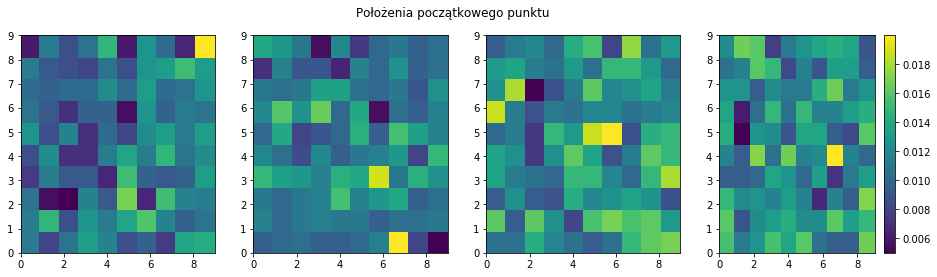

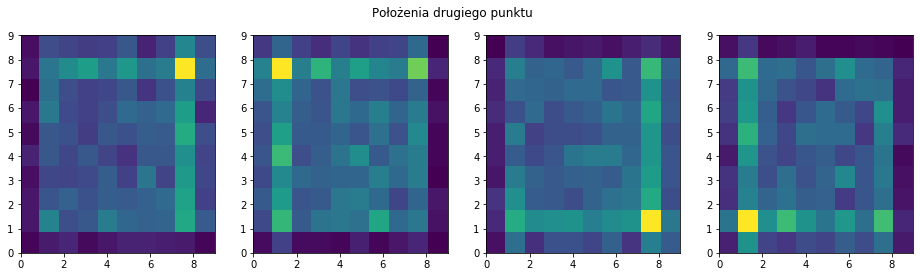

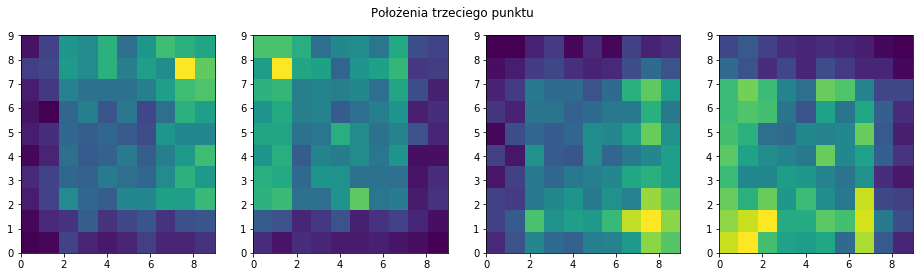

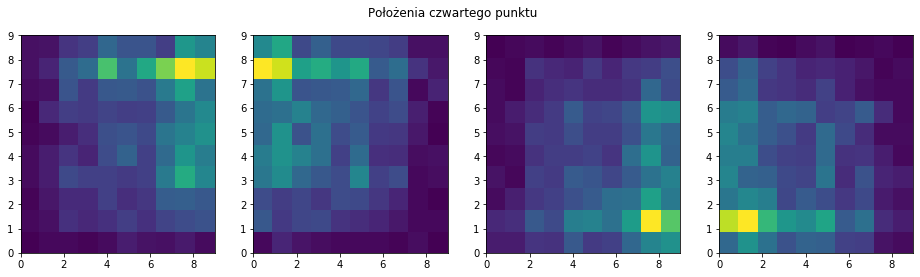

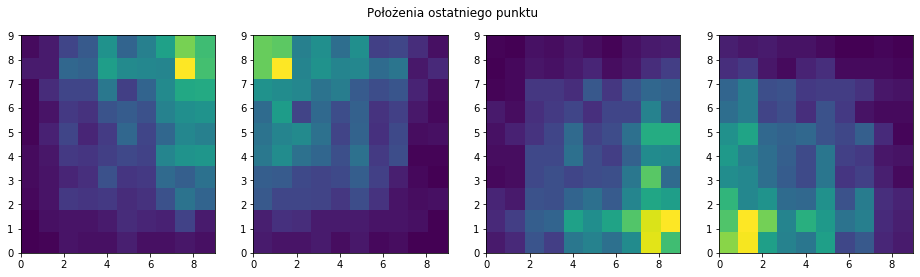

In [6]:
fig, ax = plt.subplots(1,4, figsize = (16,4))
fig.suptitle("Położenia początkowego punktu")
ax[0].hist2d(train_x[idx0,0,0],train_x[idx0,0,1], density = True)
ax[1].hist2d(train_x[idx1,0,0],train_x[idx1,0,1], density = True)
ax[2].hist2d(train_x[idx2,0,0],train_x[idx2,0,1], density = True)
h = ax[3].hist2d(train_x[idx3,0,0],train_x[idx3,0,1], density = True)
fig.colorbar(h[3])
plt.show()
fig, ax = plt.subplots(1,4, figsize = (16,4))
fig.suptitle("Położenia drugiego punktu")
ax[0].hist2d(train_x[idx0,1,0],train_x[idx0,1,1])
ax[1].hist2d(train_x[idx1,1,0],train_x[idx1,1,1])
ax[2].hist2d(train_x[idx2,1,0],train_x[idx2,1,1])
ax[3].hist2d(train_x[idx3,1,0],train_x[idx3,1,1])
plt.show()
fig, ax = plt.subplots(1,4, figsize = (16,4))
fig.suptitle("Położenia trzeciego punktu")
ax[0].hist2d(train_x[idx0,2,0],train_x[idx0,2,1])
ax[1].hist2d(train_x[idx1,2,0],train_x[idx1,2,1])
ax[2].hist2d(train_x[idx2,2,0],train_x[idx2,2,1])
ax[3].hist2d(train_x[idx3,2,0],train_x[idx3,2,1])
plt.show()
fig, ax = plt.subplots(1,4, figsize = (16,4))
fig.suptitle("Położenia czwartego punktu")
ax[0].hist2d(train_x[idx0,4,0],train_x[idx0,3,1])
ax[1].hist2d(train_x[idx1,4,0],train_x[idx1,3,1])
ax[2].hist2d(train_x[idx2,4,0],train_x[idx2,3,1])
ax[3].hist2d(train_x[idx3,4,0],train_x[idx3,3,1])
plt.show()
fig, ax = plt.subplots(1,4, figsize = (16,4))
fig.suptitle("Położenia ostatniego punktu")
ax[0].hist2d(train_x[idx0,4,0],train_x[idx0,4,1])
ax[1].hist2d(train_x[idx1,4,0],train_x[idx1,4,1])
ax[2].hist2d(train_x[idx2,4,0],train_x[idx2,4,1])
ax[3].hist2d(train_x[idx3,4,0],train_x[idx3,4,1])
plt.show()

Z tych histogramów można wyczytać ciekawe obserwacje: choć położenia pierwszego początkowego punktu są dość równiomiernie rozłożeone na płaszczyźnie, to w przypadku następnych czterech punktów widać pewną koncetracje: w prawym górnym rogu dla klasy a, w lewym górnym rogu dla klasy b itd.

Dla porównania, sprawdzę, jaki jest rozkład różnicy między ostatnim a pierwszym punktem, czyli czy szeregi z danej klasy "zmierzają" w jakimś kierunku.

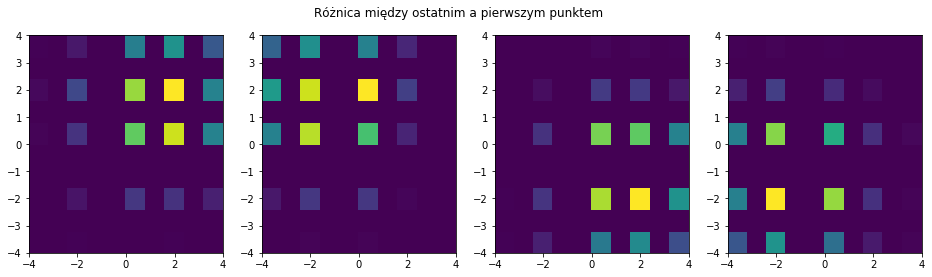

In [72]:
fig, ax = plt.subplots(1,4, figsize = (16,4))
fig.suptitle("Różnica między ostatnim a pierwszym punktem ")
differences = train_x[:,4,:] - train_x[:,0,:]
ax[0].hist2d(differences[idx0,0],differences[idx0,1])
ax[1].hist2d(differences[idx1,0],differences[idx1,1])
ax[2].hist2d(differences[idx2,0],differences[idx2,1])
ax[3].hist2d(differences[idx3,0],differences[idx3,1])
plt.show()

Okazuje się, że różnica między ostatnim a pierwszym punktem szeregu dość czytelnie rozróżnia 4 różne klasy szeregów. W takim raze, zobaczę jak przedstawiają się histogramy różnic kolejnych punktów (drugi minus pierwszy, trzeci minus drugi itd.)

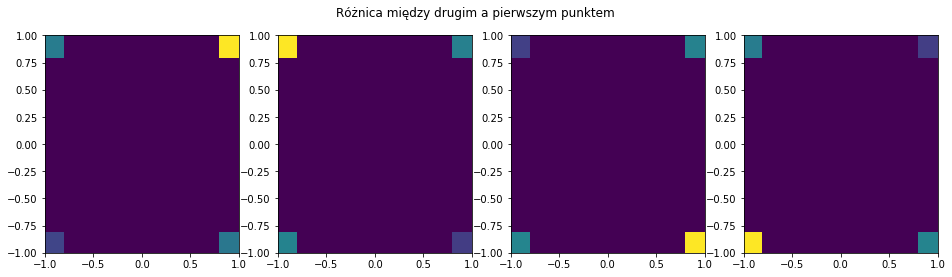

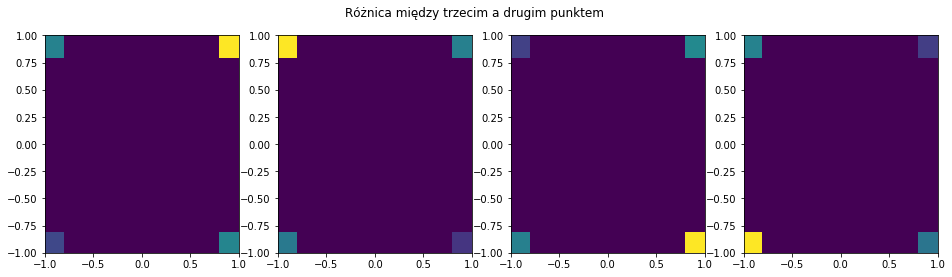

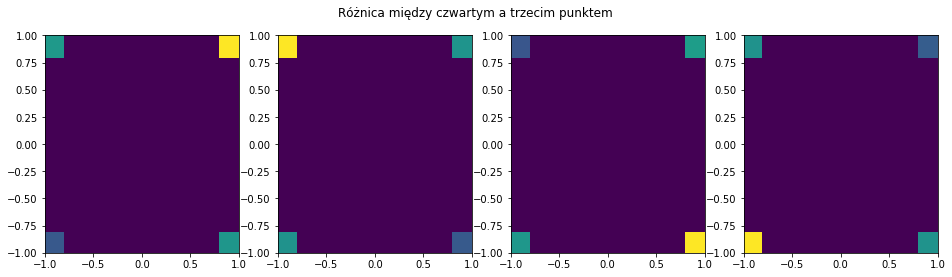

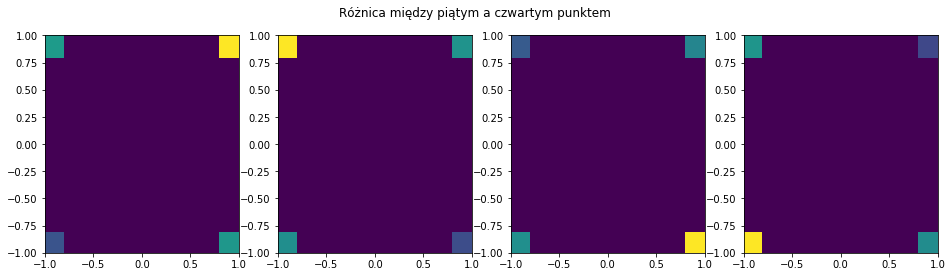

In [8]:
fig, ax = plt.subplots(1,4, figsize = (16,4))
fig.suptitle("Różnica między drugim a pierwszym punktem ")
differences = train_x[:,1,:] - train_x[:,0,:]
ax[0].hist2d(differences[idx0,0],differences[idx0,1])
ax[1].hist2d(differences[idx1,0],differences[idx1,1])
ax[2].hist2d(differences[idx2,0],differences[idx2,1])
ax[3].hist2d(differences[idx3,0],differences[idx3,1])
plt.show()

fig, ax = plt.subplots(1,4, figsize = (16,4))
fig.suptitle("Różnica między trzecim a drugim punktem ")
differences = train_x[:,2,:] - train_x[:,1,:]
ax[0].hist2d(differences[idx0,0],differences[idx0,1])
ax[1].hist2d(differences[idx1,0],differences[idx1,1])
ax[2].hist2d(differences[idx2,0],differences[idx2,1])
ax[3].hist2d(differences[idx3,0],differences[idx3,1])
plt.show()

fig, ax = plt.subplots(1,4, figsize = (16,4))
fig.suptitle("Różnica między czwartym a trzecim punktem ")
differences = train_x[:,3,:] - train_x[:,2,:]
ax[0].hist2d(differences[idx0,0],differences[idx0,1])
ax[1].hist2d(differences[idx1,0],differences[idx1,1])
ax[2].hist2d(differences[idx2,0],differences[idx2,1])
ax[3].hist2d(differences[idx3,0],differences[idx3,1])
plt.show()

fig, ax = plt.subplots(1,4, figsize = (16,4))
fig.suptitle("Różnica między piątym a czwartym punktem ")
differences = train_x[:,4,:] - train_x[:,3,:]
ax[0].hist2d(differences[idx0,0],differences[idx0,1])
ax[1].hist2d(differences[idx1,0],differences[idx1,1])
ax[2].hist2d(differences[idx2,0],differences[idx2,1])
ax[3].hist2d(differences[idx3,0],differences[idx3,1])
plt.show()

Stąd widać, że w każdym szeregu dwa kolejne punkty różnią się o jeden z czterech wektorów (1,1),(1,-1),(-1,1),(-1,-1). Co więcej, statystycznie najwięcej punktów szeregów typu 'a' przesuwa się o (1,1), typu 'b' o (-1,1) itd. Ma to tym bardziej sens, że ostatni punkt szeregu 'a' wypada najczęściej w górnej prawej ćwiartce, szeregu 'b' w lewej górnej ćwiartce itd.

### Model na surowych danych

In [7]:
import torch
import torch.nn as nn

In [8]:
import torch
from torch.utils.data import TensorDataset, DataLoader
import torch.nn as nn

train_data = TensorDataset(torch.from_numpy(train_x), torch.from_numpy(train_y))
test_data = TensorDataset(torch.from_numpy(test_x), torch.from_numpy(test_y))

batch_size = 250

train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size)
test_loader = DataLoader(test_data, shuffle=True, batch_size=batch_size)

In [9]:
is_cuda = torch.cuda.is_available()

if is_cuda:
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

In [10]:
class RecurrentNet(nn.Module):
    def __init__(self, output_size, input_dim, hidden_dim, n_layers):
        super(RecurrentNet, self).__init__()
        self.output_size = output_size
        self.n_layers = n_layers
        self.hidden_dim = hidden_dim
        
        self.lstm = nn.LSTM(input_dim, hidden_dim, n_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_size)
        #self.softmax = nn.LogSoftmax()
        
    def forward(self, x, hidden):
        batch_size = x.size(0)
        #embeds = self.embedding(x)
        lstm_out, hidden = self.lstm(x, hidden)
        #lstm_out = lstm_out.contiguous().view(-1, self.hidden_dim)
        lstm_out = lstm_out[:, -1, :]
        out = self.fc(lstm_out)
        #out = self.softmax(out)
        
        return out, hidden
    
    def init_hidden(self, batch_size):
        weight = next(self.parameters()).data
        hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().to(device),
                      weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().to(device))
        return hidden

Żeby znaleźć właściwą architekturę, robię grid search po różnych wartościach hidden_dims, n_layers oraz po różnych learning rate w Adam optimizer.

In [207]:
output_size = 4
input_dim = 2
hidden_dims = [5,10]
n_layers = [1,2,3,4]
learning_rates = [0.001,0.01]

criterion = nn.CrossEntropyLoss()
train_losses = []
test_losses = []
test_acc = []

In [22]:
epochs = 100
clip = 5

for h_dim in hidden_dims:
    for n_l in n_layers:
        for lr in learning_rates:
            test_acc_min = 0.
            model = RecurrentNet(output_size, input_dim, h_dim, n_l).double()
            model.to(device)
            optimizer = torch.optim.Adam(model.parameters(), lr=lr)
            model.train()
            for i in range(epochs):
                h = model.init_hidden(batch_size)
                for inputs, labels in train_loader:
                    h = tuple([e.data.double() for e in h])
                    inputs, labels = inputs.to(device).double(), labels.to(device)
                    model.zero_grad()
                    output, h = model(inputs, h)
                    loss = criterion(output, labels)
                    loss.backward()
                    nn.utils.clip_grad_norm_(model.parameters(), clip)
                    optimizer.step()
                    train_losses.append(loss.item())

                test_h = model.init_hidden(batch_size)
                correct = 0
                total = 0
                model.eval()
                for inp, lab in test_loader:
                    test_h = tuple([each.data for each in test_h])
                    inp, lab = inp.to(device), lab.to(device)
                    out, test_h = model(inp, test_h)
                    test_loss = criterion(out, lab)
                    test_losses.append(test_loss)

                    _, predicted = torch.max(out.data, 1)
                    total += lab.size(0)
                    correct += (predicted == labels).sum().item()
                test_acc.append(correct/total)    
                model.train()
                if test_acc[-1] >= test_acc_min:
                    torch.save(model.state_dict(), '../../results/pgrabysz/state_dict_hidden_dim={:}_n_layers={:}_lr={:}.pt'.format(h_dim,n_l,lr))
                    test_acc_min = test_acc[-1]
            params = 'hidden_dim={:}_n_layers={:}_lr={:}'.format(h_dim,n_l, lr)
            np.save('../../results/pgrabysz/train_losses_'+params+'.npy', train_losses)
            np.save('../../results/pgrabysz/test_losses_'+params+'.npy', test_losses)
            np.save('../../results/pgrabysz/test_acc_'+params+'.npy', test_acc)
            

In [42]:
def average_loss(loss, batch_size=250, epochs=100):
    av_loss = np.zeros(epochs)
    n_batches = int(len(loss)/epochs)
    for i in range(epochs):
        av_loss[i] = np.mean(loss[i*n_batches:(i+1)*n_batches])
    return av_loss

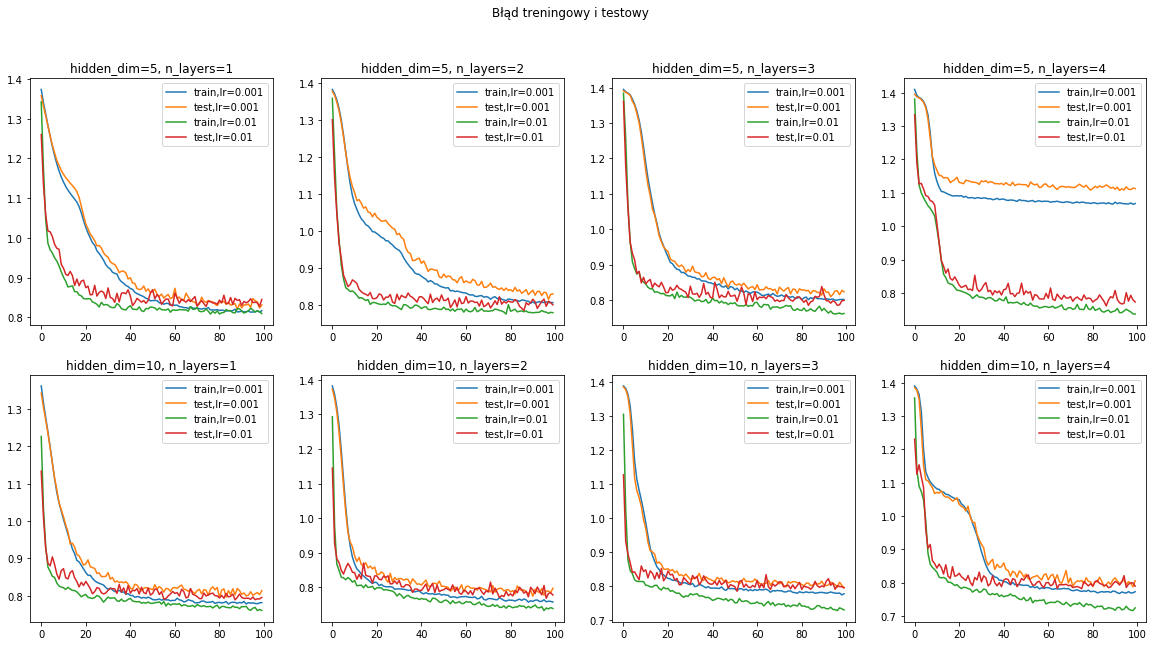

In [58]:
path = '../../results/pgrabysz/'
fig, ax = plt.subplots(len(hidden_dims), len(n_layers),figsize=(20,10))
fig.suptitle("Błąd treningowy i testowy")
for row, h in enumerate(hidden_dims):
    for col, l in enumerate(n_layers):
        for lr in learning_rates:
            params = 'hidden_dim={:}_n_layers={:}_lr={:}'.format(h, l, lr)
            loss = np.load(path+'train_losses_'+params+'.npy')
            ax[row, col].plot(average_loss(loss), label='train,lr={:}'.format(lr))
            loss = np.load(path+'test_losses_'+params+'.npy')
            ax[row, col].plot(average_loss(loss), label='test,lr={:}'.format(lr))
            
            ax[row, col].set_title('hidden_dim={:}, n_layers={:}'.format(h,l))
            ax[row, col].legend()      

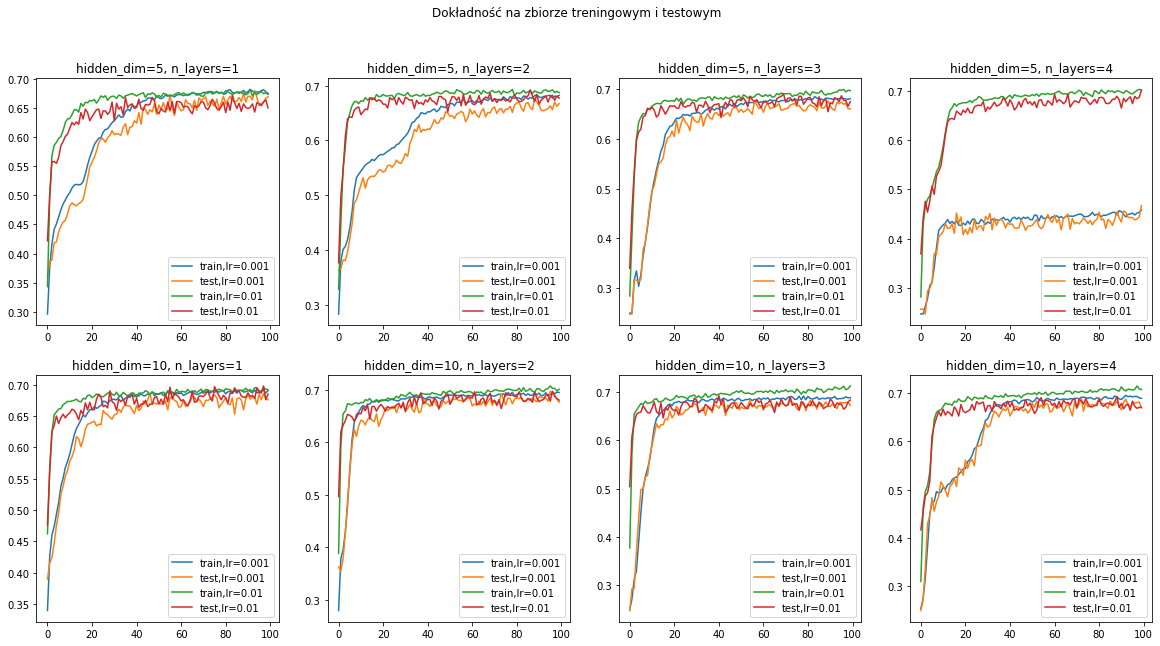

In [59]:
path = '../../results/pgrabysz/'
fig, ax = plt.subplots(len(hidden_dims), len(n_layers),figsize=(20,10))
fig.suptitle("Dokładność na zbiorze treningowym i testowym")
for row, h in enumerate(hidden_dims):
    for col, l in enumerate(n_layers):
        for lr in learning_rates:
            params = 'hidden_dim={:}_n_layers={:}_lr={:}'.format(h, l, lr)
            loss =np.load(path+'train_acc_'+params+'.npy')
            ax[row, col].plot(loss, label='train,lr={:}'.format(lr))
            loss =np.load(path+'test_acc_'+params+'.npy')
            ax[row, col].plot(loss, label='test,lr={:}'.format(lr))
            
            ax[row, col].set_title('hidden_dim={:}, n_layers={:}'.format(h,l))
            ax[row, col].legend()      

Wszystkie modele, poza jednym (hidden_dims=5, n_layers=4, learning_rate=0.001) osiągnęły dokładność > 65% na zbiozre testowym.

### Model z embedingiem

Najpierw zamieniam punkty na kracie na liczby od 0 do 99.

In [137]:
np.random.seed(1)
perm = np.random.permutation(100).reshape(10,10)

new_train_x = np.zeros((train_x.shape[0],5))
for i in range(train_x.shape[0]):
    for j in range(5):
        new_train_x[i,j] = perm[int(train_x[i,j,0]),int(train_x[i,j,1])]
        
new_test_x = np.zeros((test_x.shape[0],5))
for i in range(test_x.shape[0]):
    for j in range(5):
        new_test_x[i,j] = perm[int(test_x[i,j,0]),int(test_x[i,j,1])]

In [108]:
train_data = TensorDataset(torch.from_numpy(new_train_x), torch.from_numpy(train_y))
test_data = TensorDataset(torch.from_numpy(new_test_x), torch.from_numpy(test_y))

batch_size = 250

train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size)
test_loader = DataLoader(test_data, shuffle=True, batch_size=batch_size)

In [104]:
class RecurrentNetWithEmbedding(nn.Module):
    def __init__(self, output_size, embedding_dim, hidden_dim, n_layers):
        super(RecurrentNetWithEmbedding, self).__init__()
        self.output_size = output_size
        self.n_layers = n_layers
        self.hidden_dim = hidden_dim
        
        self.embedding = nn.Embedding(100, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, n_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_size)
        
    def forward(self, x, hidden):
        batch_size = x.size(0)
        x = x.long()
        embeds = self.embedding(x)
        lstm_out, hidden = self.lstm(embeds, hidden)
        #lstm_out = lstm_out.contiguous().view(-1, self.hidden_dim)
        lstm_out = lstm_out[:, -1, :]
        out = self.fc(lstm_out)
        #out = self.softmax(out)
        
        return out, hidden
    
    def init_hidden(self, batch_size):
        weight = next(self.parameters()).data
        hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().to(device),
                      weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().to(device))
        return hidden

Kiedy trenowałem sieć bez embeddingu, to okazało się, że nie ma specjalnej różnicy w dokładności, niezależnie ile użyję hidden_dims oraz n_layers. Dlatego nie będę trenować dużej sieci embeddingiem - hidden_dims=5 oraz n_layers=1. 

In [237]:
output_size = 4
embedding_dim = 2
h_dim = 5
n_l = 1
lr = 0.01

criterion = nn.CrossEntropyLoss()

epochs = 100
clip = 5

In [106]:
model = RecurrentNetWithEmbedding(output_size, embedding_dim, h_dim, n_l).double()
model.to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
model.train()

train_losses = []
train_acc = []
test_losses = []
test_acc = []
test_acc_max = 0.

for i in range(epochs):
    h = model.init_hidden(batch_size)
    correct_train = 0
    total_train = 0
    for inputs, labels in train_loader:
        h = tuple([e.data.double() for e in h])
        inputs, labels = inputs.to(device).double(), labels.to(device)
        model.zero_grad()
        output, h = model(inputs, h)
        loss = criterion(output, labels)
        loss.backward()
        nn.utils.clip_grad_norm_(model.parameters(), clip)
        optimizer.step()
        train_losses.append(loss.item())
        
        _, predicted = torch.max(output.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()
    train_acc.append(correct_train/total_train)
    test_h = model.init_hidden(batch_size)
    correct = 0
    total = 0
    model.eval()
    for inp, lab in test_loader:
        test_h = tuple([each.data for each in test_h])
        inp, lab = inp.to(device), lab.to(device)
        out, test_h = model(inp, test_h)
        test_loss = criterion(out, lab)
        test_losses.append(test_loss.item())

        _, predicted = torch.max(out.data, 1)
        total += lab.size(0)
        correct += (predicted == lab).sum().item()
    test_acc.append(correct/total)    
    
    embedded_space = model.embedding(torch.tensor(new_train_x).to(device).long())
    np.save('../../results/pgrabysz/embeddings/epoch_{:}.npy'.format(i), embedded_space.cpu().detach().numpy())
    
    model.train()
    if test_acc[-1] >= test_acc_max:
        torch.save(model.state_dict(), '../../results/pgrabysz/state_dict/state_dict_embedding_hidden_dim={:}_n_layers={:}_lr={:}.pt'.format(h_dim,n_l,lr))
        test_acc_max = test_acc[-1]
        
params = 'hidden_dim={:}_n_layers={:}_lr={:}'.format(h_dim,n_l, lr)
np.save('../../results/pgrabysz/train_losses_embedding_'+params+'.npy', train_losses)
np.save('../../results/pgrabysz/train_acc_embedding_'+params+'.npy', train_acc)
np.save('../../results/pgrabysz/test_losses_embedding_'+params+'.npy', test_losses)
np.save('../../results/pgrabysz/test_acc_embedding_'+params+'.npy', test_acc)


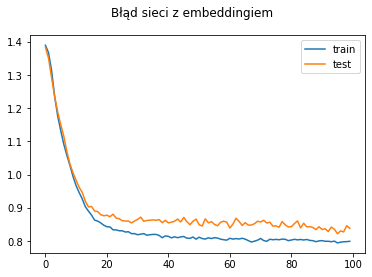

In [225]:
path = '../../results/pgrabysz/'
plt.suptitle('Błąd sieci z embeddingiem')
params = 'hidden_dim={:}_n_layers={:}_lr={:}'.format(h_dim, n_l,lr)
loss = np.load(path+'train_losses_embedding_'+params+'.npy')
plt.plot(average_loss(loss), label='train')

loss = np.load(path+'test_losses_embedding_'+params+'.npy')
plt.plot(average_loss(loss), label='test')

plt.legend()     
plt.show()

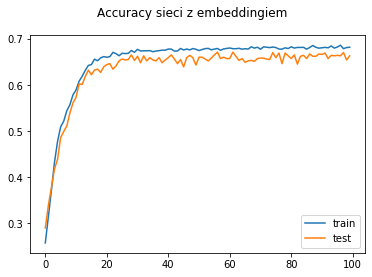

In [238]:
path = '../../results/pgrabysz/'

plt.suptitle('Accuracy sieci z embeddingiem')
params = 'hidden_dim={:}_n_layers={:}_lr={:}'.format(h_dim, n_l,lr)
acc = np.load(path+'train_acc_embedding_'+params+'.npy')
plt.plot(acc, label='train')

acc = np.load(path+'test_acc_embedding_'+params+'.npy')
plt.plot(acc, label='test')

plt.legend()     
plt.show()

In [213]:
max(acc)

0.671

In [216]:
PATH = '../../results/pgrabysz/state_dict/state_dict_embedding_hidden_dim={:}_n_layers={:}_lr={:}.pt'.format(h_dim, n_l,lr)
model = RecurrentNetWithEmbedding(output_size, embedding_dim, hidden_dim, n_layers)
model.load_state_dict(torch.load(PATH, map_location=torch.device('cpu')))

<All keys matched successfully>

In [217]:
embedded_space = model.embedding(torch.tensor(new_train_x).long())
embedded_space = embedded_space.detach().numpy()

Do każdego punktu na scatter plot dodaję szum gaussowski, żeby punkty nie nakładały się na siebie, a było widać, gdzie koncetruje się jaka kategoria szeregów.

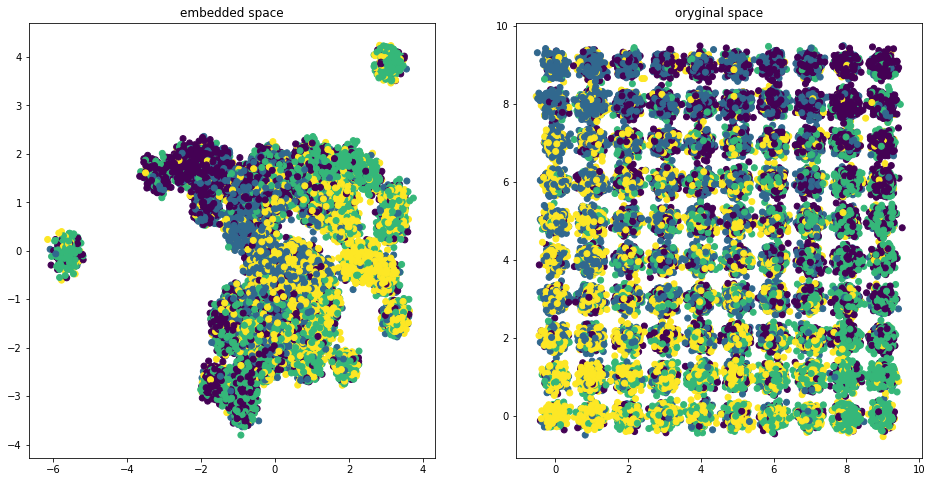

In [222]:
sd = 0.15
_, ax = plt.subplots(1,2,figsize = (16,8))
for i in range(5):
    rand_x = np.random.normal(0,sd,size=9000)
    rand_y = np.random.normal(0,sd,size=9000)
    ax[0].scatter(embedded_space[:,i,0]+rand_x,embedded_space[:,i,1]+rand_y, c = train_y)
    ax[1].scatter(train_x[:,i,0]+rand_x, train_x[:,i,1]+rand_y, c = train_y)
    ax[0].set_title('embedded space')
    ax[1].set_title('oryginal space')
plt.show()    

Ponieważ różnica między pierwszym a ostatnim punktem szeregu wydawała się dobrze rozdzielać 4 kategorie szeregów, to poniżej robię scatter plot różnicy między pierwszym a ostatnim w embedded space:

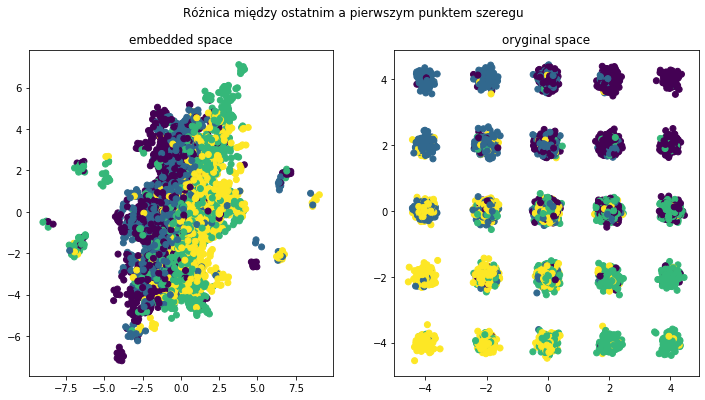

In [223]:
embedded_differences = embedded_space[:,4,:] - embedded_space[:,0,:]
differences = train_x[:,4,:] - train_x[:,0,:]
fig, ax = plt.subplots(1,2,figsize=(12,6))
fig.suptitle('Różnica między ostatnim a pierwszym punktem szeregu',fontsize=12)
ax[0].scatter(embedded_differences[:,0]+rand_x,embedded_differences[:,1]+rand_y, c = train_y)
ax[1].scatter(differences[:,0]+rand_x,differences[:,1]+rand_y, c = train_y)
ax[0].set_title('embedded space')
ax[1].set_title('oryginal space')
plt.show()

Zobaczmy, jak zmieniała się różnica między pierwszym a ostatnim punktem podczas trenowania sieci. Wyświetlam tylko 30 pierwszych epoch, ponieważ w trakcie trenowania po 30 epoce dokładność w zasadzie przestała rosnąć. Można zauważyć, że na początku klasy szeregów są rozrzucone po całej płaszczyźnie, a w trakcie treningu żółte wyraźnie oddzielają się od granatowych. Poza tym, punkty nie są rozłone równomiernie wokół środka, tylko odrobinę skierowane z lewego dolnego rogu do prawnego górnego.

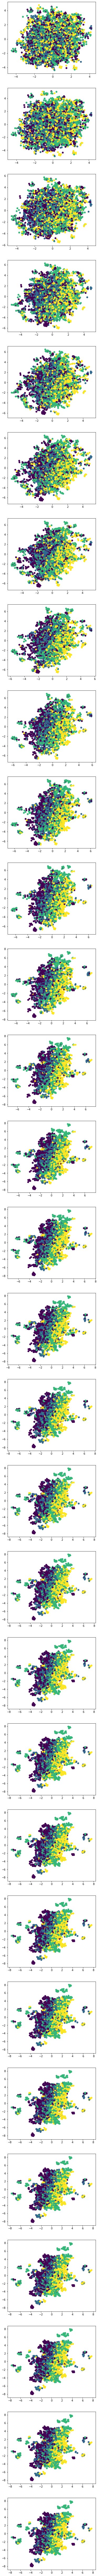

In [235]:
fig, ax = plt.subplots(30,1, figsize = (6,180))
for i in range(30):
    emb_space = np.load('../../results/pgrabysz/embeddings/epoch_'+str(i)+'.npy')
    emb_differences = emb_space[:,4,:] - emb_space[:,0,:]
    ax[i].scatter(emb_differences[:,0]+rand_x, emb_differences[:,1]+rand_y, c = train_y)

Poniżej scatter ploty, jak zmieniało się położenie punktów w trakcie trenowania:

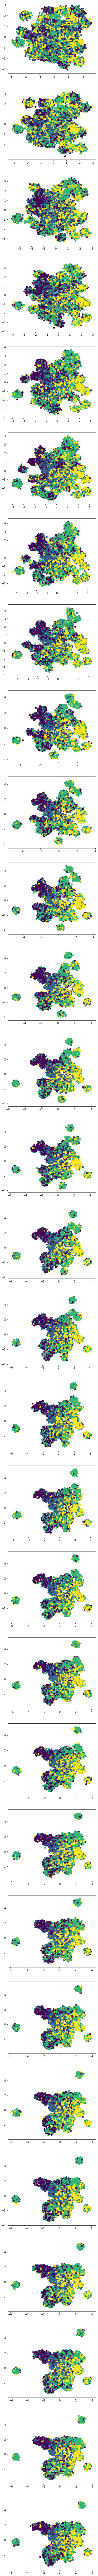

In [239]:
fig, ax = plt.subplots(30,1, figsize = (6,180))
for i in range(30):
    emb_space = np.load('../../results/pgrabysz/embeddings/epoch_'+str(i)+'.npy')
    for j in range(5):
        rand_x = np.random.normal(0,sd,size=9000)
        rand_y = np.random.normal(0,sd,size=9000)
        ax[i].scatter(emb_space[:,j,0]+rand_x,emb_space[:,j,1]+rand_y, c = train_y)